In [2]:
from PIL import Image
import numpy
import random
import math

apple = Image.open("banner.png")
array = numpy.array(apple)


for i in range(len(array)):
    for j in range(len(array[i])):
        if array[i][j][0] > 150:
            array[i][j] = [0,min(255,2 * array[i][j][1]),min(255,2 * array[i][j][2]), 255]
        array[i][j][0] += random.uniform(-0.1, 0.1)
        array[i][j][1] += random.uniform(-0.1, 0.1)
        array[i][j][2] += random.uniform(-0.1, 0.1)
        array[i][j][3] += random.uniform(-0.1, 0.1)

apple2 = Image.fromarray(array)
apple2.show()

FileNotFoundError: [Errno 2] No such file or directory: 'banner.png'

[-0.98430076 -0.98450787 -0.98471494 -0.98492199 -0.98512898 -0.9853359
 -0.98554274 -0.98574948 -0.9859561  -0.9861626  -0.98636894 -0.98657511
 -0.98678109 -0.98698687 -0.98719242 -0.98739772 -0.98760276 -0.98780751
 -0.98801196 -0.98821607 -0.98841983 -0.98862322 -0.9888262  -0.98902876
 -0.98923088 -0.98943251 -0.98963365 -0.98983426 -0.99003432 -0.99023379
 -0.99043265 -0.99063087 -0.99082842 -0.99102527 -0.99122138 -0.99141673
 -0.99161127 -0.99180499 -0.99199783 -0.99218977 -0.99238076 -0.99257078
 -0.99275978 -0.99294772 -0.99313456 -0.99332026 -0.99350478 -0.99368807
 -0.9938701  -0.9940508  -0.99423015 -0.99440808 -0.99458455 -0.99475951
 -0.99493291 -0.99510469 -0.99527481 -0.9954432  -0.9956098  -0.99577457
 -0.99593743 -0.99609834 -0.99625722 -0.99641401 -0.99656864 -0.99672106
 -0.99687119 -0.99701895 -0.99716428 -0.9973071  -0.99744733 -0.99758491
 -0.99771974 -0.99785175 -0.99798085 -0.99810695 -0.99822997 -0.99834983
 -0.99846641 -0.99857964 -0.99868941 -0.99879562 -0.

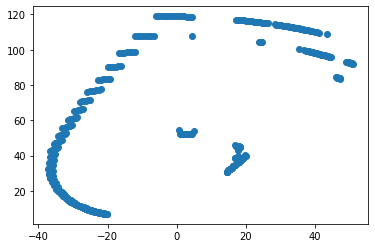

In [3]:
from PIL import Image
import numpy
from Controller import converter
import cv2

from matplotlib import pyplot

leftImg, rightImg = numpy.split(numpy.array(Image.open("img7.png")), 2, axis=1)

def show(img):
    Image.fromarray(img).show()

# show(leftImg)

filteredLeftImg = converter.filter(leftImg)
leftEdgesImage, gLeftIn, rLeftIn = cv2.split(filteredLeftImg)

# show(leftEdgesImage)

filteredRightImg = converter.filter(rightImg)
rightEdgesImage, gRightIn, rRightIn = cv2.split(filteredRightImg)

distances, croppedLeft, rawHeightsLeft = converter.getDistances(leftEdgesImage, rightEdgesImage)

for i in rawHeightsLeft:
    croppedLeft[i][rawHeightsLeft[i]] = 125
show(croppedLeft)
# image = []

print(rawHeightsLeft)

# # print(heights)
# # print(left)
# print(distances)
x = []
y = []
for i in distances:
    print(i)
    if i[2] < 200:
        x.append(i[0])
        y.append(i[1])

pyplot.scatter(x, y)
# for i in range(len(rawHeightsLeft)):
#     print(rawHeightsLeft[i])
#     print(distances[i])

# for i in distances:
#     image.append([i[2], i[2], i[2]])
# show(numpy.array(image))
# show(numpy.concatenate(([distances], [distances], [distances]), axis=0))
rBlobs, gBlobs = converter.getBlobs(rLeftIn, gLeftIn, rRightIn, gRightIn)

print(gBlobs)

outerWallLandmarks, innerWallLandmarks, rBlobLandmarks, gBlobLandmarks = converter.getLandmarks(distances, rBlobs, gBlobs)

for landmark in outerWallLandmarks:
    if landmark[2] < 30:
        print(landmark)
# print(outerWallLandmarks, innerWallLandmarks, rBlobLandmarks, gBlobLandmarks)

In [ ]:
import math

horizontalFov = 155
verticalFov = 115
imageWidth = 272
imageHeight = 154
focalLength = ((imageHeight / 2) / math.tan(math.pi * (verticalFov / 2) / 180))
wallHeight = 10
centerOffset = 10
dist = wallHeight * math.sqrt(focalLength**2 + (imageWidth / 2 - 29)**2) / 36
# return (dir * (3 + a[1] * dist), (10 + a[2] * dist), dist)

print(focalLength)
dist